In [28]:
from osgeo import gdal

tif_file2003 = '../data/size_monthly/Global_fire_atlas_size_monthly_2003.tif'
tif_file2004 = '../data/size_monthly/Global_fire_atlas_size_monthly_2004.tif'
tif_file2005 = '../data/size_monthly/Global_fire_atlas_size_monthly_2005.tif'
tif_file2006 = '../data/size_monthly/Global_fire_atlas_size_monthly_2006.tif'
tif_file2007 = '../data/size_monthly/Global_fire_atlas_size_monthly_2007.tif'
tif_file2008 = '../data/size_monthly/Global_fire_atlas_size_monthly_2008.tif'
tif_file2009 = '../data/size_monthly/Global_fire_atlas_size_monthly_2009.tif'
tif_file2010 = '../data/size_monthly/Global_fire_atlas_size_monthly_2010.tif'
tif_file2011 = '../data/size_monthly/Global_fire_atlas_size_monthly_2011.tif'
tif_file2012 = '../data/size_monthly/Global_fire_atlas_size_monthly_2012.tif'
tif_file2013 = '../data/size_monthly/Global_fire_atlas_size_monthly_2013.tif'
tif_file2014 = '../data/size_monthly/Global_fire_atlas_size_monthly_2014.tif'
tif_file2015 = '../data/size_monthly/Global_fire_atlas_size_monthly_2015.tif'
tif_file2016 = '../data/size_monthly/Global_fire_atlas_size_monthly_2016.tif'
 
tif = [tif_file2003, tif_file2004, tif_file2005, tif_file2006, tif_file2007, tif_file2008, tif_file2009, tif_file2010, tif_file2011, tif_file2012, tif_file2013, tif_file2014, tif_file2015, tif_file2016]

In [17]:
ds = gdal.Open(tif_file2003)
if ds is None:
    print('Failed to open the TIFF file.')
else:
    data = ds.ReadAsArray()
    print('Raster dimensions:', data.shape)
    print('Data type:', data.dtype)

Raster dimensions: (12, 720, 1440)
Data type: float32


In [18]:
# bands
bands = ds.RasterCount
print(bands)

metadata = ds.GetMetadata()
print(metadata)

12
{'AREA_OR_POINT': 'Area'}


In [19]:
import numpy as np
import matplotlib.pyplot as plt

print("Minimum value:", np.min(data))
print("Maximum value:", np.max(data))
print("Mean value:", np.mean(data))
print("Standard deviation:", np.std(data))

Minimum value: -9999.0
Maximum value: 7149.849
Mean value: -9861.371
Standard deviation: 1165.8971


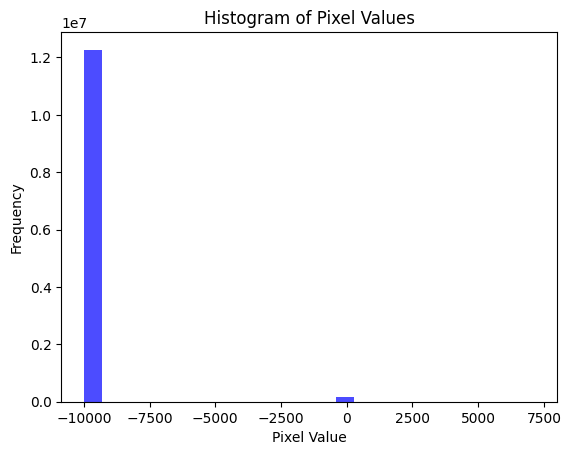

In [20]:
plt.hist(data.flatten(), bins='auto', color='b', alpha=0.7)
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.title("Histogram of Pixel Values")
plt.show()

(12, 720, 1440)


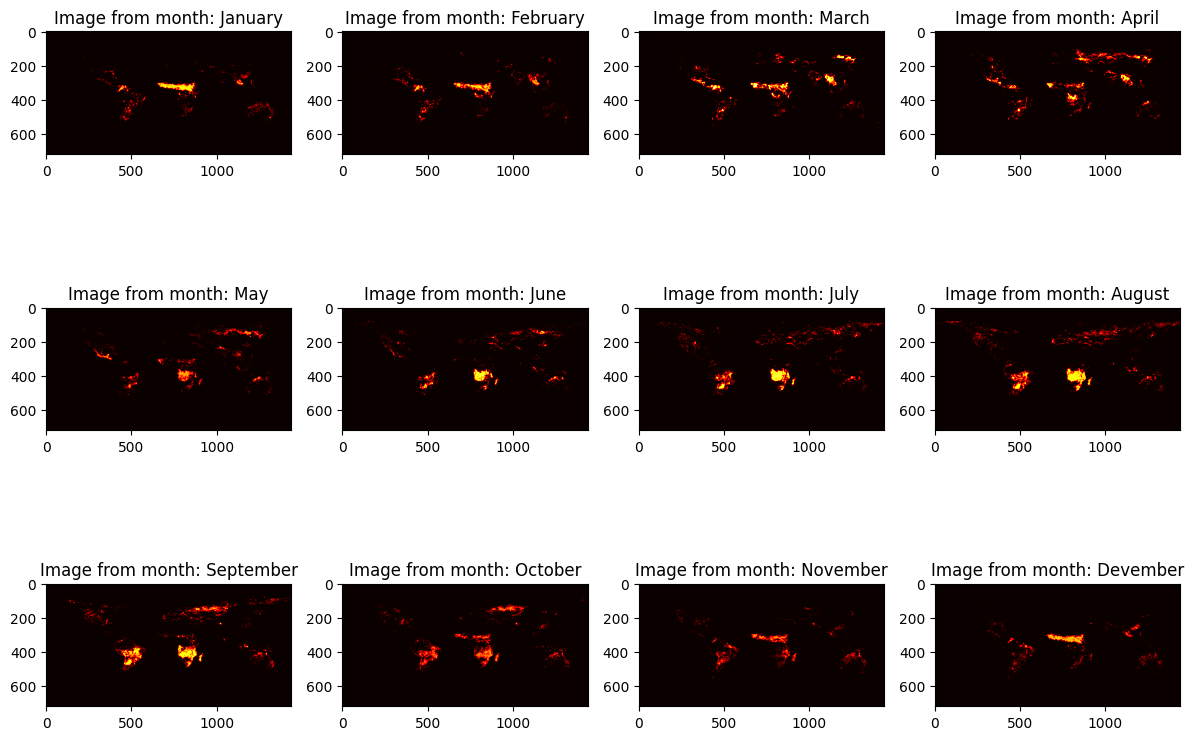

In [21]:
print(data.shape)

import matplotlib.pyplot as plt

# Create subplots for each image
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9))

# Iterate over the images and plot them
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'Devember']

for i, ax in enumerate(axes.flatten()):
    ax.imshow(data[i], cmap='hot')
    ax.set_title(f"Image from month: " + months[i])

plt.tight_layout()
# Show the plot
plt.show()

Animation saved as animation.gif


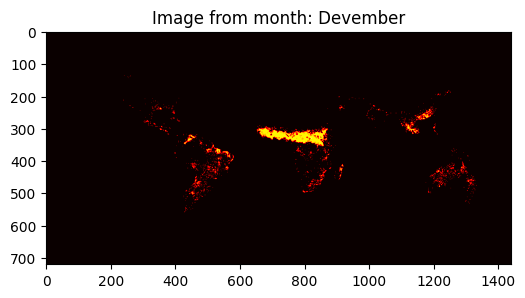

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
image = axes.imshow(data[0], cmap='hot')
axes.set_title("Image from month: " + months[0])

# Update function for animation
def update(frame):
    image.set_array(data[frame])
    axes.set_title("Image from month: " + months[frame])
    return image,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=range(12), interval=1000, blit=True)

# Save the animation as a GIF file
ani.save("../sample_images/animation.gif", writer='pillow')

# Display a message once the animation is saved
print("Animation saved as animation.gif")

In [26]:
!pip3 install imageio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 8.7 MB/s eta 0:00:00a 0:00:01


Animation saved as animation.gif


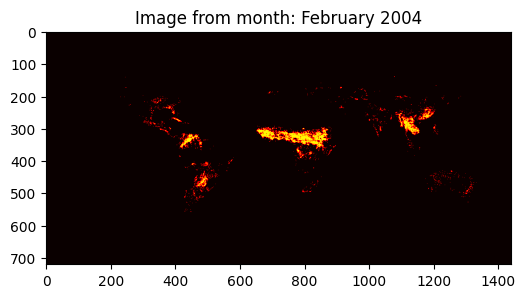

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from osgeo import gdal

tif_file2003 = '../data/size_monthly/Global_fire_atlas_size_monthly_2003.tif'
tif_file2004 = '../data/size_monthly/Global_fire_atlas_size_monthly_2004.tif'
tif_file2005 = '../data/size_monthly/Global_fire_atlas_size_monthly_2005.tif'
tif_file2006 = '../data/size_monthly/Global_fire_atlas_size_monthly_2006.tif'
tif_file2007 = '../data/size_monthly/Global_fire_atlas_size_monthly_2007.tif'
tif_file2008 = '../data/size_monthly/Global_fire_atlas_size_monthly_2008.tif'
tif_file2009 = '../data/size_monthly/Global_fire_atlas_size_monthly_2009.tif'
tif_file2010 = '../data/size_monthly/Global_fire_atlas_size_monthly_2010.tif'
tif_file2011 = '../data/size_monthly/Global_fire_atlas_size_monthly_2011.tif'
tif_file2012 = '../data/size_monthly/Global_fire_atlas_size_monthly_2012.tif'
tif_file2013 = '../data/size_monthly/Global_fire_atlas_size_monthly_2013.tif'
tif_file2014 = '../data/size_monthly/Global_fire_atlas_size_monthly_2014.tif'
tif_file2015 = '../data/size_monthly/Global_fire_atlas_size_monthly_2015.tif'
tif_file2016 = '../data/size_monthly/Global_fire_atlas_size_monthly_2016.tif'

tif_files = [
    tif_file2003, tif_file2004, tif_file2005, tif_file2006, tif_file2007, tif_file2008, tif_file2009,
    tif_file2010, tif_file2011, tif_file2012, tif_file2013, tif_file2014, tif_file2015, tif_file2016
]

data = []
for tif_file in tif_files:
    ds = gdal.Open(tif_file)
    data.append(ds.ReadAsArray())
data = np.array(data)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
image = axes.imshow(data[0, 0], cmap='hot')
axes.set_title("Image from month: January 2003")

def update(frame):
    month = frame % 12
    year = 2003 + frame // 12
    image.set_array(data[year - 2003, month])
    axes.set_title(f"Image from month: {months[month]} {year}")
    return image,

ani = animation.FuncAnimation(fig, update, frames=data.shape[0], interval=1000, blit=True)

# Save the animation as a GIF file
ani.save("../sample_images/animation1.gif", writer='pillow')

print("Animation saved as animation.gif")

In [40]:
# Statistical Summary
print("Statistical Summary:")
print("Mean:", np.mean(data))
print("Median:", np.median(data))
print("Standard Deviation:", np.std(data))
print("Minimum:", np.min(data))
print("Maximum:", np.max(data))
print()

Statistical Summary:
Mean: -9867.232
Median: -9999.0
Standard Deviation: 1145.2256
Minimum: -9999.0
Maximum: 40025.695



In [73]:
import numpy as np
from sklearn.decomposition import PCA

# Reshape the data to combine all images and bands
n_images = len(data)
n_bands = data[0].shape[0]
image_shape = data[0].shape[1:]
combined_data = np.concatenate([data[i].reshape(n_bands, -1) for i in range(n_images)], axis=1)

pca = PCA(n_components=2)
pca.fit(combined_data.T)

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Transform the data using the PCA model
transformed_data = pca.transform(combined_data.T)
inverse_transformed_data = pca.inverse_transform(transformed_data)
reshaped_transformed_data = np.transpose(inverse_transformed_data).reshape(n_images, n_bands, *image_shape)

In [78]:
explained_variance_ratio

array([0.37257721, 0.18140834, 0.10497756])

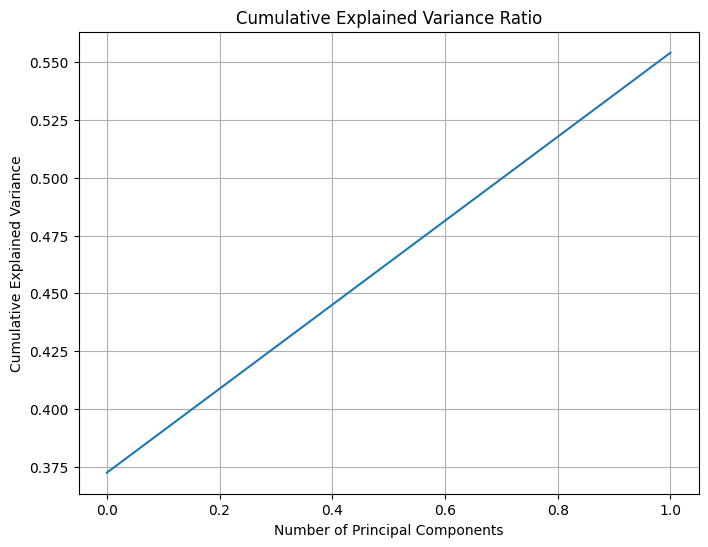

In [70]:
import matplotlib.pyplot as plt

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

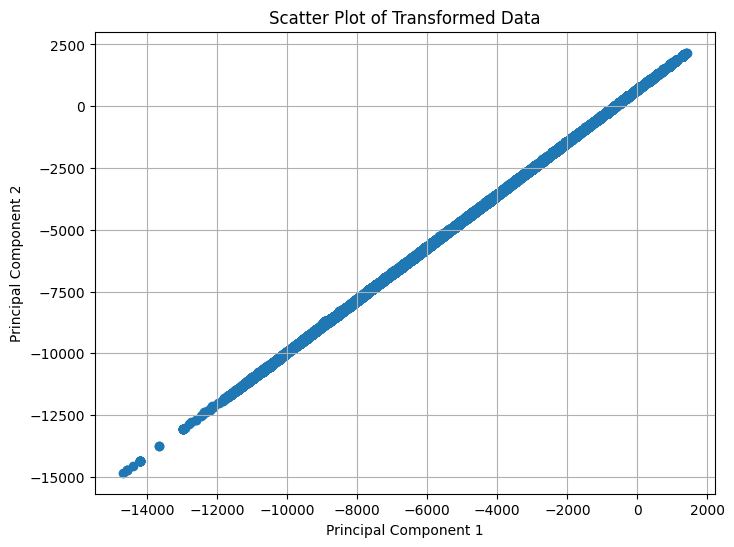

In [71]:

# Plot scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(inverse_transformed_data[:, 0], inverse_transformed_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Transformed Data')
plt.grid(True)
plt.show()

A slope of 45 degrees suggests that the two principal components are highly correlated and exhibit equal influence in capturing the variability of the data. In other words, the two components contribute equally to the overall structure and patterns observed in the data.

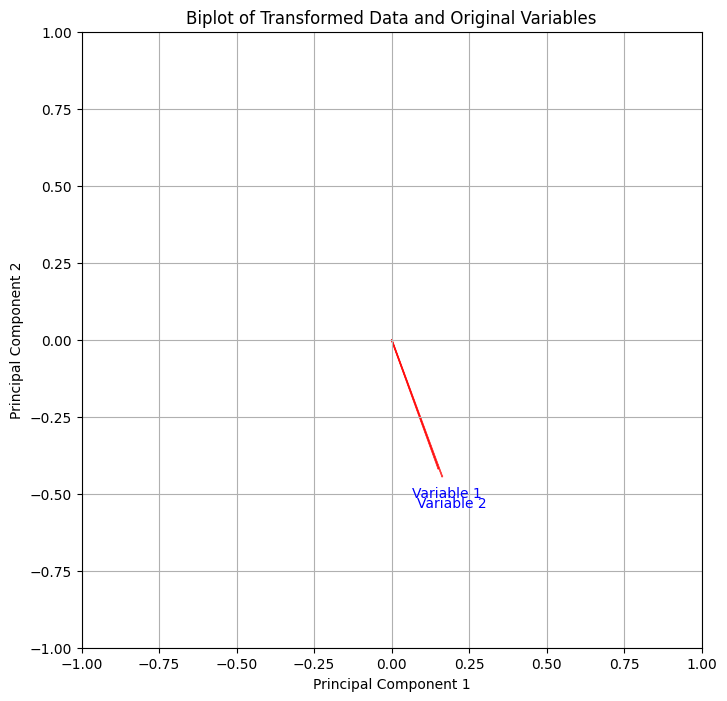

In [72]:
# Create a biplot of the first two principal components and original variables
plt.figure(figsize=(8, 8))
for i in range(len(pca.components_)):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.7)
    plt.text(pca.components_[0, i] * 1.2, pca.components_[1, i] * 1.2, f"Variable {i+1}", color='b', ha='center', va='center')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot of Transformed Data and Original Variables')
plt.grid(True)
plt.show()

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


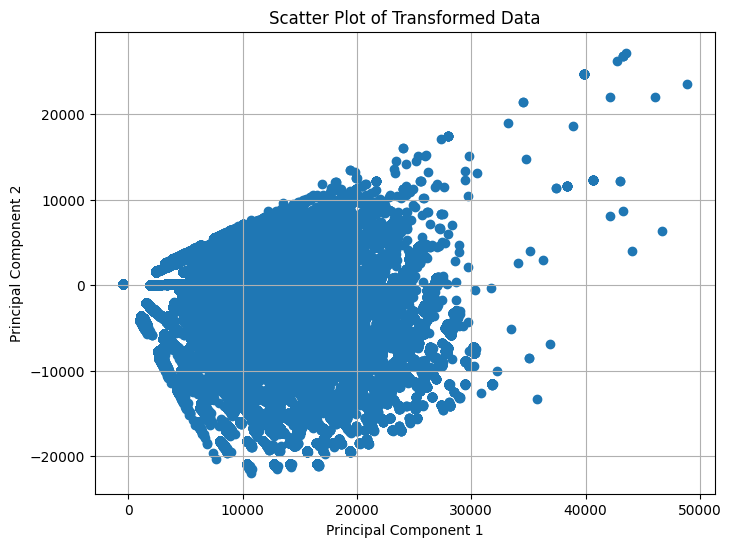

In [79]:
import numpy as np
import matplotlib.pyplot as plt

loadings = pca.components_[:2]
selected_transformed_data = transformed_data[:, :2]

# Clustering Analysis
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(selected_transformed_data)

# Outlier Detection
outlier_indices = np.where(np.abs(transformed_data[:, 0]) > 0.4)

# Hypothesis Testing
from scipy.stats import pearsonr

variable = np.random.randn(selected_transformed_data.shape[0])
corr, p_value = pearsonr(selected_transformed_data[:, 0], variable)

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Transformed Data')
plt.grid(True)
plt.show()

In [80]:
# Plotting the scatter plot with clusters
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=clusters)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Transformed Data')
plt.grid(True)
plt.show()